In [12]:
from sklearn.cluster import KMeans
import pandas
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as pp
import seaborn as sb
from sklearn.manifold import TSNE
%matplotlib inline

In [13]:
df = pandas.read_csv("osu!_beatmaps_data.csv", encoding="iso-8859-1")
df_copy = pandas.read_csv("osu!_beatmaps_data.csv", encoding="iso-8859-1")
df = df.drop(['beatmap_id', 'beatmap_set_id', 'artist', 'title', 'creator', 'difficulty', 'preview_start_time', 'time_points', 'mode', 'tags', 'status', 'drain_time', 'count_spinner'], axis=1)
df.head()

,count_normal,count_slider,AR,CS,HP,OD,slider_velocity,stack_leniency,stars,length
0,51,51,7.0,4.0,6.0,5.0,1.20,0.7,2.793849,51068
1,27,38,3.5,3.0,4.0,3.0,1.00,0.7,1.964744,51068
2,519,86,7.0,5.0,5.0,7.0,2.00,0.6,4.399912,184027
3,336,54,4.0,4.0,4.0,4.0,1.92,0.6,2.411059,184027
4,146,64,0.0,3.0,0.0,0.0,1.40,0.6,1.673866,179530


In [14]:
model = TSNE(learning_rate=10, perplexity=5, n_iter=5000)

In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['length']])
df.length = scaler.transform(df[['length']])

scaler.fit(df[['count_normal']])
df.count_normal = scaler.transform(df[['count_normal']])

scaler.fit(df[['stars']])
df.stars = scaler.transform(df[['stars']])

scaler.fit(df[['AR']])
df.AR = scaler.transform(df[['AR']])

scaler.fit(df[['CS']])
df.CS = scaler.transform(df[['CS']])

scaler.fit(df[['HP']])
df.HP = scaler.transform(df[['HP']])

scaler.fit(df[['OD']])
df.OD = scaler.transform(df[['OD']])

scaler.fit(df[['slider_velocity']])
df.slider_velocity = scaler.transform(df[['slider_velocity']])

scaler.fit(df[['stack_leniency']])
df.stack_leniency = scaler.transform(df[['stack_leniency']])

scaler.fit(df[['count_slider']])
df.count_slider = scaler.transform(df[['count_slider']])

df.head()

,count_normal,count_slider,AR,CS,HP,OD,slider_velocity,stack_leniency,stars,length
0,0.008904,0.013881,0.70,0.500,0.6,0.5,0.2500,0.7,0.235605,0.017893
1,0.004714,0.010343,0.35,0.375,0.4,0.3,0.1875,0.7,0.151859,0.017893
2,0.090608,0.023408,0.70,0.625,0.5,0.7,0.5000,0.6,0.397830,0.080092
3,0.058659,0.014698,0.40,0.500,0.4,0.4,0.4750,0.6,0.196940,0.080092
4,0.025489,0.017420,0.00,0.375,0.0,0.0,0.3125,0.6,0.122478,0.077988


In [16]:
tsne_features = model.fit_transform(df)
tsne_features

array([[-23.360138 , -50.618214 ],
       [ 31.442877 ,  31.237087 ],
       [ 54.10639  , -57.17587  ],
       ...,
       [ 70.20583  ,  58.14649  ],
       [ -3.3667095, -94.169304 ],
       [-78.18134  , -53.748035 ]], dtype=float32)

In [24]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]
df['creator'] = df_copy['creator']

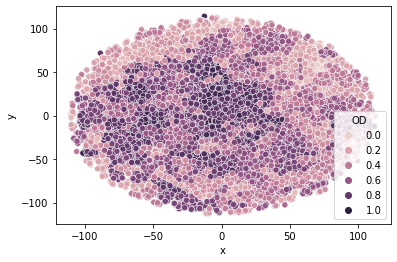

In [26]:
sb.scatterplot(x='x', y='y', hue='OD', data=df)
pp.show()

In [21]:
df.to_csv('df.tsv', sep='\t')